In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle

In [2]:
df=pd.read_csv('ipl.csv')

In [3]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
df['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [5]:
# Data Cleaning
# Romoving unwanted columns
columns_to_remove=['mid','venue','batsman','bowler','striker','non-striker']
df.drop(labels=columns_to_remove,axis=1,inplace=True)

In [6]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [7]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [8]:
# Keeping only consistant teams
consistent_teams=['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils', 'Sunrisers Hyderabad']

In [9]:
df.replace('Deccan Chargers','Sunrisers Hyderabad',inplace=True)

In [10]:
df['bowl_team'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings', 'Sunrisers Hyderabad',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Gujarat Lions', 'Rising Pune Supergiant'], dtype=object)

In [11]:
df=df[(df['bat_team'].isin(consistent_teams))&(df['bowl_team'].isin(consistent_teams))]

In [12]:
df['bowl_team'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings', 'Sunrisers Hyderabad'],
      dtype=object)

In [13]:
df.shape

(62464, 9)

In [14]:
# removing the first 5overs of data in our data
# atleast we require 5 overs of current match data to predict
df=df[df['overs']>=5.0]

In [15]:
df.shape

(46560, 9)

In [16]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [17]:
# converting the date column string to datatime
from datetime import datetime
df['date']=df['date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

In [18]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [19]:
# converting Categorical variable by one hot encoding
encode_df=pd.get_dummies(data=df,columns=['bat_team','bowl_team']) #drop_first=True

In [20]:
encode_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [21]:
encode_df.skew()

runs                                     0.475312
wickets                                  0.672786
overs                                    0.003225
runs_last_5                              0.550897
wickets_last_5                           0.774972
total                                   -0.130853
bat_team_Chennai Super Kings             2.111396
bat_team_Delhi Daredevils                2.624448
bat_team_Kings XI Punjab                 2.171087
bat_team_Kolkata Knight Riders           2.429474
bat_team_Mumbai Indians                  2.012406
bat_team_Rajasthan Royals                2.650540
bat_team_Royal Challengers Bangalore     2.405921
bat_team_Sunrisers Hyderabad             1.931290
bowl_team_Chennai Super Kings            2.662384
bowl_team_Delhi Daredevils               1.980658
bowl_team_Kings XI Punjab                2.322390
bowl_team_Kolkata Knight Riders          2.155162
bowl_team_Mumbai Indians                 2.163375
bowl_team_Rajasthan Royals               2.387629


In [22]:
encode_dff=encode_df.drop(['date'],axis=1)

In [23]:
encode_dff.head()

,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,61,0,5.1,59,0,222,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
33,61,1,5.2,59,1,222,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
34,61,1,5.3,59,1,222,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
35,61,1,5.4,59,1,222,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
36,61,1,5.5,58,1,222,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [25]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = encode_dff.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(encode_dff.values, i)
                          for i in range(len(encode_dff.columns))]
  
print(vif_data)

C:\Users\SONY\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                                  feature        VIF
0                                    runs  17.971754
1                                 wickets   4.779051
2                                   overs  16.193027
3                             runs_last_5   2.668251
4                          wickets_last_5   2.215322
5                                   total   2.870441
6            bat_team_Chennai Super Kings        inf
7               bat_team_Delhi Daredevils        inf
8                bat_team_Kings XI Punjab        inf
9          bat_team_Kolkata Knight Riders        inf
10                bat_team_Mumbai Indians        inf
11              bat_team_Rajasthan Royals        inf
12   bat_team_Royal Challengers Bangalore        inf
13           bat_team_Sunrisers Hyderabad        inf
14          bowl_team_Chennai Super Kings        inf
15             bowl_team_Delhi Daredevils        inf
16              bowl_team_Kings XI Punjab        inf
17        bowl_team_Kolkata Knight Riders     

In [26]:
xtrain=encode_df[encode_df['date'].dt.year<=2016]
xtest=encode_df[encode_df['date'].dt.year>2016]

In [27]:
xtrain.shape

(43782, 23)

In [28]:
xtest.shape

(2778, 23)

In [29]:
x_train=xtrain.drop(['total'],axis=1)
y_train=xtrain['total']

In [30]:
x_test=xtest.drop(['total'],axis=1)
y_test=xtest['total']

In [31]:
#removing Date Column
x_train.drop(['date'],axis=1,inplace=True)
x_test.drop(['date'],axis=1,inplace=True)

In [32]:
x_train.head()

,runs,wickets,overs,runs_last_5,wickets_last_5,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,61,0,5.1,59,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
33,61,1,5.2,59,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
34,61,1,5.3,59,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
35,61,1,5.4,59,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
36,61,1,5.5,58,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


## Linear Regression 

In [33]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [34]:
y_train_pred=lr.predict(x_train)

In [35]:
y_train_pred

array([188.11957006, 181.50096405, 180.85076709, ..., 195.43433633,
       195.69645095, 200.58881129])

In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [37]:
print(f"Mean absolute error : {mean_absolute_error(y_train,y_train_pred)}")
print(f"Mean squared error : {mean_squared_error(y_train,y_train_pred)}")
print(f"Mean r2_score : {r2_score(y_train,y_train_pred)}")
print(f"Root Mean squared error : {np.sqrt(mean_squared_error(y_train,y_train_pred))}")

Mean absolute error : 12.944597471222506
Mean squared error : 298.07522945770427
Mean r2_score : 0.6434239762715919
Root Mean squared error : 17.264855326868634


In [38]:
y_test_pred=lr.predict(x_test)

In [39]:
print(f"Mean absolute error : {mean_absolute_error(y_test,y_test_pred)}")
print(f"Mean squared error : {mean_squared_error(y_test,y_test_pred)}")
print(f"Mean r2_score : {r2_score(y_test,y_test_pred)}")
print(f"Root Mean squared error : {np.sqrt(mean_squared_error(y_test,y_test_pred))}")

Mean absolute error : 12.325592870102236
Mean squared error : 258.56448418154446
Mean r2_score : 0.7448052770113552
Root Mean squared error : 16.079940428420265


## Ridge Reg

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [41]:
ridge=Ridge()
parameters={'alpha':(1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100)}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x_train,y_train)

C:\Users\SONY\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.45373e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\SONY\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.26506e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\SONY\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.18544e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\SONY\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.34548e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\SONY\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.36639e-18): result may not be accurate.
  r

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': (1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100)},
             scoring='neg_mean_squared_error')

In [42]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-314.11426942296987


In [43]:
y_train_pred=ridge_regressor.predict(x_train)

In [44]:
print(f"Mean absolute error : {mean_absolute_error(y_train,y_train_pred)}")
print(f"Mean squared error : {mean_squared_error(y_train,y_train_pred)}")
print(f"Mean r2_score : {r2_score(y_train,y_train_pred)}")
print(f"Root Mean squared error : {np.sqrt(mean_squared_error(y_train,y_train_pred))}")

Mean absolute error : 12.941539841799871
Mean squared error : 298.078377166748
Mean r2_score : 0.6434202107873659
Root Mean squared error : 17.264946486066734


In [45]:
y_test_pred=ridge_regressor.predict(x_test)

In [46]:
print(f"Mean absolute error : {mean_absolute_error(y_test,y_test_pred)}")
print(f"Mean squared error : {mean_squared_error(y_test,y_test_pred)}")
print(f"Mean r2_score : {r2_score(y_test,y_test_pred)}")
print(f"Root Mean squared error : {np.sqrt(mean_squared_error(y_test,y_test_pred))}")

Mean absolute error : 12.319730995116702
Mean squared error : 258.50218734852416
Mean r2_score : 0.7448667619561882
Root Mean squared error : 16.078003213972938


## Lasso Regression

In [47]:
from sklearn.linear_model import Lasso
lasso=Lasso()
parameters={'alpha':(1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100)}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(x_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\SONY\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5226807.956318943, tolerance: 2885.2420395431786
  model = cd_fast.enet_coordinate_descent(
C:\Users\SONY\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5264652.22052711, tolerance: 2934.4855920171167
  model = cd_fast.enet_coordinate_descent(
C:\Users\SONY\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5116149.421864367, tolerance: 2881.7619313766986
  model = cd_fast.enet_coordinate_descent(
C:\Users\SONY\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

{'alpha': 1}
-312.23343688009516


In [48]:
y_train_pred=lasso_regressor.predict(x_train)

In [49]:
print(f"Mean absolute error : {mean_absolute_error(y_train,y_train_pred)}")
print(f"Mean squared error : {mean_squared_error(y_train,y_train_pred)}")
print(f"Mean r2_score : {r2_score(y_train,y_train_pred)}")
print(f"Root Mean squared error : {np.sqrt(mean_squared_error(y_train,y_train_pred))}")

Mean absolute error : 13.04994403792246
Mean squared error : 309.33180395263605
Mean r2_score : 0.6299581657058906
Root Mean squared error : 17.587831132707525


In [50]:
y_test_pred=ridge_regressor.predict(x_test)

In [51]:
print(f"Mean absolute error : {mean_absolute_error(y_test,y_test_pred)}")
print(f"Mean squared error : {mean_squared_error(y_test,y_test_pred)}")
print(f"Mean r2_score : {r2_score(y_test,y_test_pred)}")
print(f"Root Mean squared error : {np.sqrt(mean_squared_error(y_test,y_test_pred))}")

Mean absolute error : 12.319730995116702
Mean squared error : 258.50218734852416
Mean r2_score : 0.7448667619561882
Root Mean squared error : 16.078003213972938


## Random Forest

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [53]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [54]:
"""# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)"""

"# Create the random grid\nrandom_grid = {'n_estimators': n_estimators,\n               'max_features': max_features,\n               'max_depth': max_depth,\n               'min_samples_split': min_samples_split,\n               'min_samples_leaf': min_samples_leaf}\n\nprint(random_grid)"

In [55]:
"""# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()"""

'# Use the random grid to search for best hyperparameters\n# First create the base model to tune\nrf = RandomForestRegressor()'

In [56]:
"""# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)"""

"# Random search of parameters, using 3 fold cross validation, \n# search across 100 different combinations\nrf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', \n                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)"

In [57]:
"""rf_random.fit(x_train,y_train)"""

'rf_random.fit(x_train,y_train)'

In [58]:
"""rf_random.best_params_"""

'rf_random.best_params_'

In [59]:
"""rf_random.best_score_"""

'rf_random.best_score_'

In [60]:
"""y_test_pred=rf_random.predict(x_test)"""

'y_test_pred=rf_random.predict(x_test)'

In [61]:
"""print(f"Mean absolute error : {mean_absolute_error(y_test,y_test_pred)}")
print(f"Mean squared error : {mean_squared_error(y_test,y_test_pred)}")
print(f"Mean r2_score : {r2_score(y_test,y_test_pred)}")
print(f"Root Mean squared error : {np.sqrt(mean_squared_error(y_test,y_test_pred))}")"""

'print(f"Mean absolute error : {mean_absolute_error(y_test,y_test_pred)}")\nprint(f"Mean squared error : {mean_squared_error(y_test,y_test_pred)}")\nprint(f"Mean r2_score : {r2_score(y_test,y_test_pred)}")\nprint(f"Root Mean squared error : {np.sqrt(mean_squared_error(y_test,y_test_pred))}")'

In [62]:
"""sns.distplot(y_test-y_test_pred)"""

'sns.distplot(y_test-y_test_pred)'

In [63]:

"""# Creating a pickle file for the classifier
filename = 'first-innings-score-lr-model.pkl'
pickle.dump(ridge_regressor, open(filename, 'wb'))"""

"# Creating a pickle file for the classifier\nfilename = 'first-innings-score-lr-model.pkl'\npickle.dump(ridge_regressor, open(filename, 'wb'))"

In [64]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

In [65]:
scores = cross_val_score(XGBRegressor(), x_train, y_train, scoring='neg_mean_squared_error')
scores

array([-415.9668051 , -350.83194508, -399.27311827, -388.79096733,
       -397.43012419])

In [66]:
xgb=XGBRegressor()

In [67]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [68]:
y_train_pred=xgb.predict(x_train)

print(f"Mean absolute error : {mean_absolute_error(y_train,y_train_pred)}")
print(f"Mean squared error : {mean_squared_error(y_train,y_train_pred)}")
print(f"Mean r2_score : {r2_score(y_train,y_train_pred)}")
print(f"Root Mean squared error : {np.sqrt(mean_squared_error(y_train,y_train_pred))}")

Mean absolute error : 7.44778605140441
Mean squared error : 104.46255635859254
Mean r2_score : 0.8750354296711624
Root Mean squared error : 10.220692557678884


In [69]:
y_test_pred=xgb.predict(x_test)

print(f"Mean absolute error : {mean_absolute_error(y_test,y_test_pred)}")
print(f"Mean squared error : {mean_squared_error(y_test,y_test_pred)}")
print(f"Mean r2_score : {r2_score(y_test,y_test_pred)}")
print(f"Root Mean squared error : {np.sqrt(mean_squared_error(y_test,y_test_pred))}")

Mean absolute error : 13.932974574375358
Mean squared error : 315.3318384641185
Mean r2_score : 0.6887777475662507
Root Mean squared error : 17.75758537820158


In [77]:
# Creating a pickle file for the classifier
filename = 'first-innings-score-xgb-model.pkl'
pickle.dump(xgb, open(filename, 'wb'))

In [71]:
# Creating a pickle file for the classifier
filename = 'first-innings-score-ridge_regressor-model.pkl'
pickle.dump(ridge_regressor, open(filename, 'wb'))

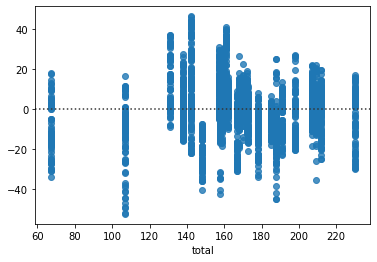

In [72]:
sns.residplot(x = y_test,
              y = y_test_pred)

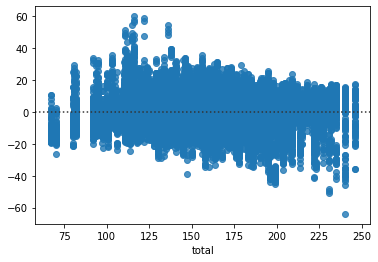

In [73]:
sns.residplot(x = y_train,
              y = y_train_pred)

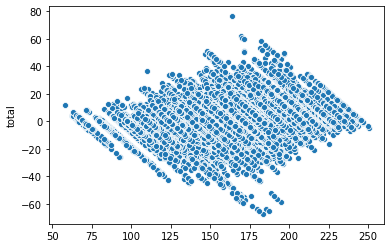

In [74]:
sns.scatterplot(x=y_train_pred, y=y_train-y_train_pred)

In [75]:
#Train_accu=[]
for model in [xgb,lasso_regressor,ridge_regressor,lr]:
    y_train_pred=model.predict(x_train)
    print(model,f'\nTrain Accuracy is : {r2_score(y_train,y_train_pred)}\n')
    #Train_accu=Train_accu.append(r2_score(y_train,y_train_pred))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 
Train Accuracy is : 0.8750354296711624

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': (1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100)},
             scoring='neg_mean_squared_error') 
Train Accuracy is : 0.6299581657058906

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': (1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 

In [76]:
for model in [xgb,lasso_regressor,ridge_regressor,lr]:
    y_test_pred=model.predict(x_test)
    print(model,f'\nTrain Accuracy is : {r2_score(y_test,y_test_pred)}\n')
    #Train_accu=Train_accu.append(r2_score(y_train,y_train_pred))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 
Train Accuracy is : 0.6887777475662507

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': (1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100)},
             scoring='neg_mean_squared_error') 
Train Accuracy is : 0.7398102652226171

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': (1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 